# **Project: Titanic - Machine Learning from Disaster**
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



# **Table of Contents**
- [1. Introduction](#introduction)
- [2. Loading the Data](#loading-data)
- [3. Exploratory Data Analysis (EDA)](#eda)
- [4. Feature Engineering & Data Wrangling](#fe-dw)
- [5. Model Training](#model-training)
- [6. Conclusion](#conclusion)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# **1. Introduction**
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.   

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# **2. Loading the data**

In [81]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [83]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Notes:**
- ``sibsp``:	# of siblings / spouses aboard the Titanic	
- ``parch``:	# of parents / children aboard the Titanic	
- ``ticket``:	Ticket number	
- ``fare``: 	Passenger fare	
- ``cabin``: 	Cabin number

In [85]:
# preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### ***PassengerId***

The first column is the passenger ID. The ID for a passenger is just a number to identify this passenger in this dataset. So this column is not really a part of the information we should care about. We can drop this column or make it the index for this dataset. Let's make it the index for the dataset just to demonstrate the use of df.set_index method.

In [86]:
train_df.set_index(train_df.PassengerId, inplace=True)

In [87]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
train_df.drop('PassengerId', axis = 1, inplace=True)

In [89]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [90]:
test_df = pd.read_csv('./data/test.csv', index_col='PassengerId')

In [91]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C



## **2.1. Feature Classification: Categorical vs Numerical**
- This helps us select the approriate plots for visualization.

#### **Which features are categorical?**
- Categorical Features: ``nominal``, ``ordinal``, ``ratio``, ``interval``.
- To classify the samples into sets of similar samples.
#### **Which features are numerical?**
- Numerical Features: ``discrete``, ``continuous``, or ``timeseries``.
- These values change from sample to sample.

In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [93]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical: ``Survived``, ``Sex``, ``Embarked``, ``Pclass`` (ordinal), ``SibSp``, ``Parch``
- Numerical: (continuous) ``Age``, ``Fare``, (discrete)
- Mix types of data: ``Ticket``, ``Cabin``
- Contain Error/Typo: ``Name``
- Blank or Null: ``Cabin`` > ``Age`` > ``Embarked``
- Various Data Type: String, Int, Float

According to the data dictionary, we know that if a passenger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flag for the person's suvivorship. Yet the data type of the column is int64, which is a numerical type. We can change that with the following command.

In [94]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [95]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [97]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

convert_cat(train_df, features)
convert_cat(test_df, features)

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## **2.1.1. Distribution of Numerical feature values across the samples**

In [99]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## **2.1.2. Distribution of Categorical features**

In [100]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **3. Exploratory Data Analysis (EDA)**

## **3.1. Correlating categorical features**
- Categorical: ``Survived``, ``Sex``, ``Embarked``, ``Pclass`` (ordinal), ``SibSp``, ``Parch``
### **Target Variable: ``Survived``**

In [101]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [102]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Only 38% survived the disaster. So the training data suffers from data imbalance but it is no severe which is why I will not consider techniques like sampling to tackle imbalance.
#### `Sex`

In [103]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


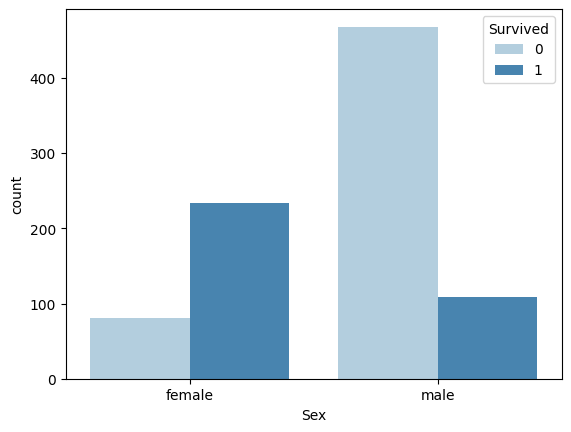

In [104]:
sns.countplot(data=train_df, x = "Sex", hue="Survived", palette="Blues");

- Remaining Categorical Feature Column

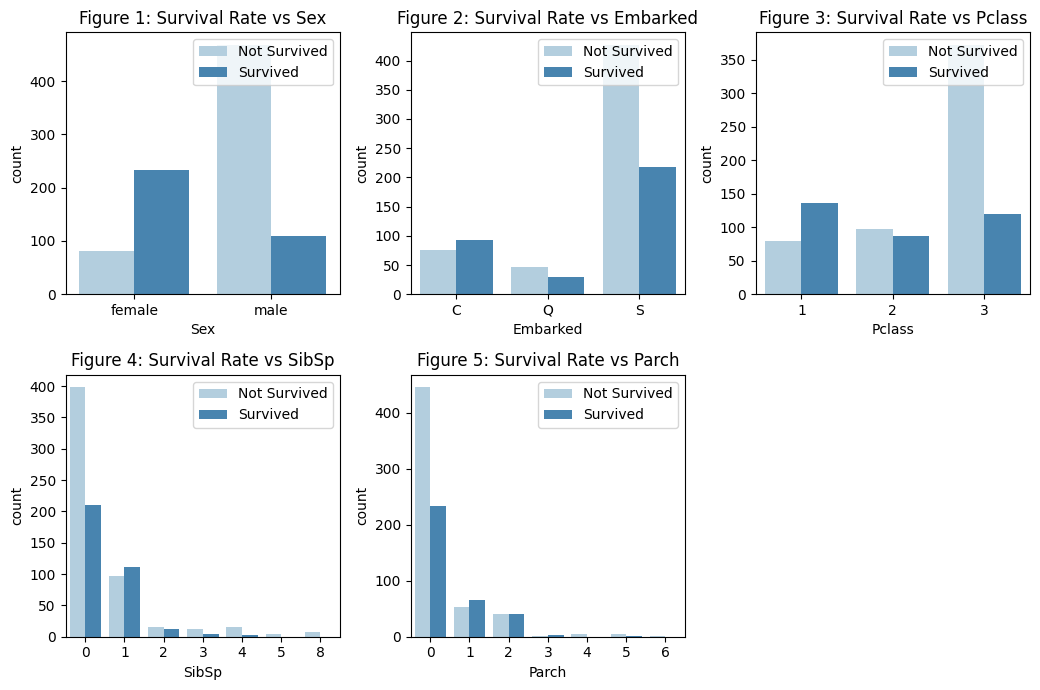

In [105]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.5, n_rows * 3.5))

for r in range (0, n_rows):
    for c in range (0, n_cols):
        i = r * n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i + 1 }: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False) # Remove the last subplot
plt.tight_layout()
plt.show()

### **Observation**
- Survival Rate:
    - Fig 1: Female survival rate > male
    - Fig 2: Most People embarked on Southampton, and also had the highest people not survived
    - Fig 3: 1st class higher survival rate
    - Fig 4: People going with 0 ``SibSp`` are mostly not survived: the number of passenger with 1-2 family members has a better chance of survival
    - Fig 5: People going with 0 ``Parch`` are mostly not survived

## **3.2. EDA for Numerical Features**
- Numerical Features: (continuous) ``Age``, ``Fare``

### **``Age``**

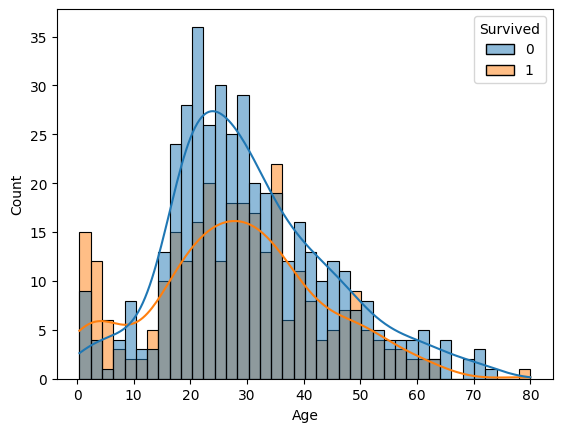

In [106]:
sns.histplot(data=train_df, x = 'Age', hue='Survived', bins=40, kde=True);

- Majority passengers were from 18-40 ages
- Children had more chance to survive than other ages

### **``Fare``**

In [107]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

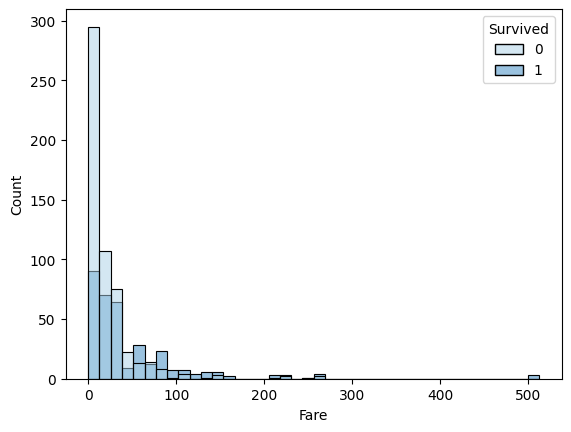

In [108]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=40, palette='Blues');

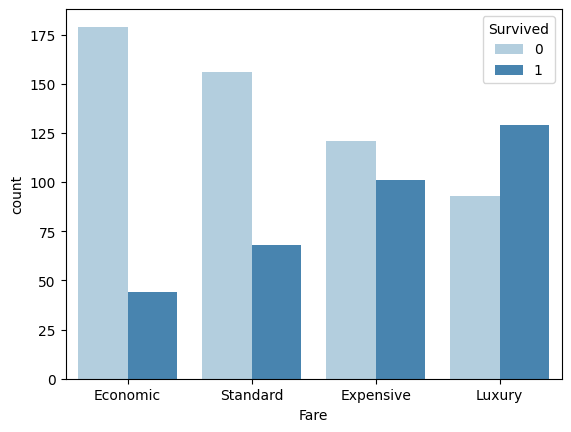

In [109]:
# To name for 0-25% quartile, 25-50, 50-75, 75-100

fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette='Blues');

In [110]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

- Distribution of Fare:
    - Fare does not follow a normal distribution and has a huge spike at the price range ``[0-100$]``.
    - The distribution is skewed to the left with ``75%`` of the fare paid under ``$31`` and a max paid fare of ``$512``.
- Quartile plot:
    - Passenger with Luxury & Expensive Fare will have more chance to survive. 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# **4. Feature Engineering and Data Wrangling**

### **Re-load dataset**

In [111]:
#train_df = pd.read_csv("./data/train.csv")
#test_df = pd.read_csv("./data/test.csv")

## **4.1. Feature Engineering**
### **``Name``**
- Regular Expression

In [112]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [113]:
import re # regular expression

def extract_title(name):
    p = re.compile(r", ([\w\s]+)\." )
    #if p.search(name) is None:
    #$    print(name)
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name:extract_title(name))

In [114]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [115]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [116]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [117]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

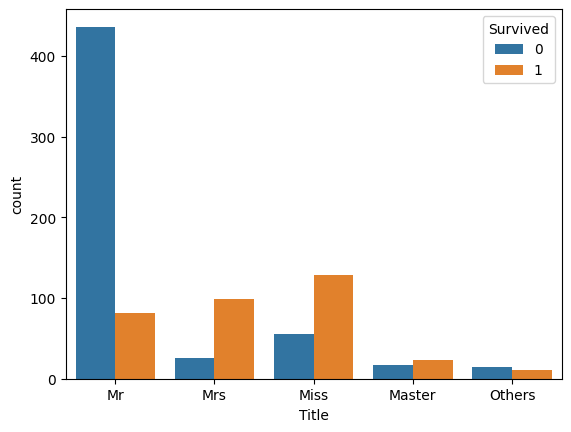

In [118]:
sns.countplot(data=train_df, x='Title', hue='Survived');

### **Family**
- ``SibSp``, ``Parch``

In [119]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [120]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [121]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large']) # (0, 1], (1, 4], (4, 6], (6, 20]
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large']) # (0, 1], (1, 4], (4, 6], (6, 20]

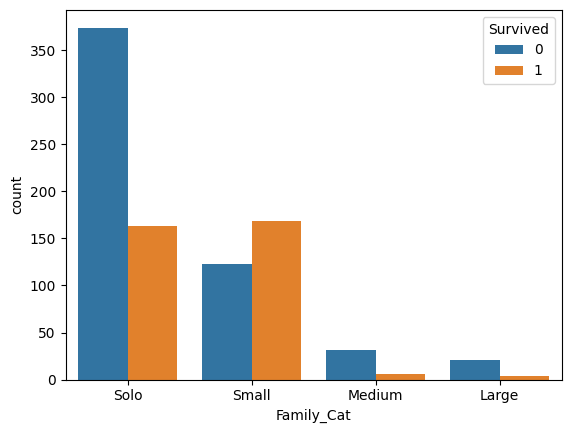

In [122]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived');

## **4.2. Data Wrangling**

In [123]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [124]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()  
        if missing_count > 0:
            print (f"Col {col} has {missing_count * 100 / n_rows:.2f}% missing values.")

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)


Col Age has 19.87% missing values.
Col Embarked has 0.22% missing values.
Col Age has 20.57% missing values.
Col Fare has 0.24% missing values.


### **Filling Missing Values**

#### **``Age``**
- Filling missing values with ``median`` of whole dataset

In [125]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age'];

C:\Users\NguyenCongPhat\AppData\Local\Temp\ipykernel_13772\1450158399.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age'];


In [126]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [127]:
train_df.groupby(['Sex', 'Pclass']).head()

C:\Users\NguyenCongPhat\AppData\Local\Temp\ipykernel_13772\730467702.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Sex', 'Pclass']).head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Solo
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,1,Solo
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1,Solo
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,5,Medium
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,Small


In [128]:
# Filling the missing values in Age with the medians of Sex and Pclass groups

train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index()['Age']


C:\Users\NguyenCongPhat\AppData\Local\Temp\ipykernel_13772\4187036898.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index()['Age']


In [129]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index()['Age']

C:\Users\NguyenCongPhat\AppData\Local\Temp\ipykernel_13772\487551902.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index()['Age']


In [130]:
feature_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

In [131]:
display_missing(train_df, feature_cols[1:])
display_missing(test_df, feature_cols[1:])

Col Embarked has 0.22% missing values.
Col Fare has 0.24% missing values.


In [132]:
X = train_df[feature_cols]
y = train_df['Survived']

In [133]:
X_test = test_df[feature_cols]

In [134]:
# preprocess pipleline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))
])

In [135]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [136]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [137]:
X = preprocessor.transform(X) # X -> X_train, X_val

In [138]:
X_test = preprocessor.transform(X_test)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# **5. Model Training**

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [141]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [142]:
X_test.shape

(418, 19)

In [143]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

In [144]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [145]:
log_reg.score(X_val, y_val)

0.8044692737430168

In [146]:
y_pred = log_reg.predict(X_val)

In [147]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       117
           1       0.70      0.77      0.73        62

    accuracy                           0.80       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.81      0.80      0.81       179



- y = ax1 + bx2 + bias -> y = a *x1^2 + b *x2^2 + c* x1*x2 + bias

In [148]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.fit_transform(X_val)

In [149]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [150]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8100558659217877

In [151]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [152]:
decision_tree.score(X_val, y_val)

0.8100558659217877

## **5.1. Cross-validation**

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)

In [155]:
lr_scores.mean(), lr_scores.std()

(np.float64(0.822666499278137), np.float64(0.02063133931398303))

In [156]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5 )

In [157]:
dt_scores.mean(), dt_scores.std()

(np.float64(0.7991525955683887), np.float64(0.024464605799887466))

## **5.2. Baseline Model Comparison**

In [158]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier #!pip install xgboost

seed = 2023
models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

In [159]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    # define k-fold:
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries =[]
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
    
    # Summary result    
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard_Deviation']

    # Sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    return baseline_results

generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)

c:\Users\NguyenCongPhat\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\NguyenCongPhat\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\NguyenCongPhat\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\NguyenCongPhat\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserW

,Mean,Standard_Deviation
model_name,,
SVC,0.837261,0.031029
LogisticRegression,0.829408,0.032639
LinearSVC,0.828284,0.034981
AdaBoostClassifier,0.819302,0.030886
XGBClassifier,0.817042,0.025451
KNeighborsClassifier,0.815906,0.036008
RandomForestClassifier,0.792367,0.016387
ExtraTreesClassifier,0.771031,0.015288
DecisionTreeClassifier,0.766568,0.020269


In [162]:
from sklearn.metrics import accuracy_score
model = SVC(random_state=seed)
model.fit(X_train, y_train)
predictions = model.predict(X_val)
acc_SVC = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_SVC)

test_df = pd.read_csv('./data/test.csv')

#output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

80.45


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# **6. Conclusion**

In this project, we successfully built a **Support Vector** classifier to predict the survival chances of Titanic passengers. Through data preprocessing, feature engineering, imputation, and model training, we were able to create a robust model with **80.45% accuracy** on the training set.

